In [529]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

In [531]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [533]:
df.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2844,2022-05-05,3,18000,110,1 out of 5,Super Area,Tri Nagar,Delhi,Unfurnished,Bachelors/Family,2,Contact Owner
2540,2022-07-04,1,16000,500,1 out of 4,Super Area,Laxmi Nagar,Delhi,Semi-Furnished,Bachelors/Family,1,Contact Owner
861,2022-05-27,3,90000,1350,5 out of 12,Carpet Area,"Mahindra Vivante, Chakala",Mumbai,Unfurnished,Family,3,Contact Agent
1817,2022-07-06,3,60000,1550,2 out of 5,Carpet Area,"Bhel Township- Malleshwaram, Malleshwaram",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Agent
2538,2022-05-14,2,28500,900,Ground out of 4,Carpet Area,Paschim Vihar,Delhi,Semi-Furnished,Bachelors/Family,2,Contact Agent


In [535]:
df = df.drop(columns=['Posted On'])

In [537]:
df.sample(5)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
862,2,95000,825,17 out of 22,Carpet Area,"lokhandwala residency, Worli",Mumbai,Furnished,Bachelors,2,Contact Agent
1792,1,7000,450,2 out of 4,Super Area,"Kattigenahalli, Bellary Road",Bangalore,Unfurnished,Bachelors/Family,1,Contact Owner
2860,2,14000,60,3 out of 3,Carpet Area,Rohini Sector 21,Delhi,Semi-Furnished,Bachelors,2,Contact Owner
4501,3,37000,1550,3 out of 5,Super Area,"Banjara Hills, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
826,3,55000,1100,15 out of 16,Carpet Area,"Sakhi, Kandivali West",Mumbai,Unfurnished,Bachelors,3,Contact Agent


In [539]:
df.shape

(4746, 11)

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 408.0+ KB


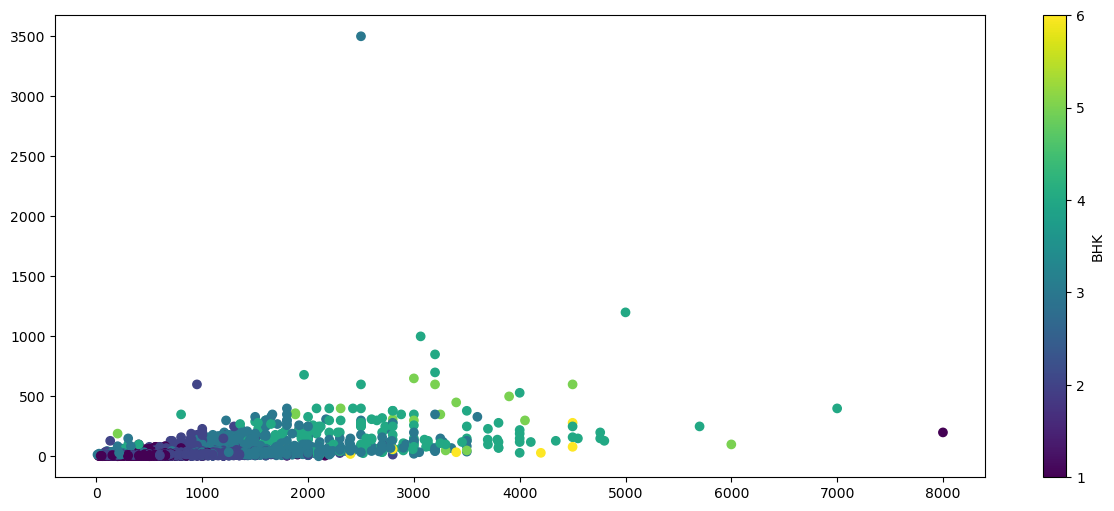

In [543]:
plt.figure(figsize=(15, 6))
plt.scatter(x=df['Size'], y=df['Rent']/1000, c=df['BHK'])
plt.colorbar(label='BHK')

## Removing the Outliers

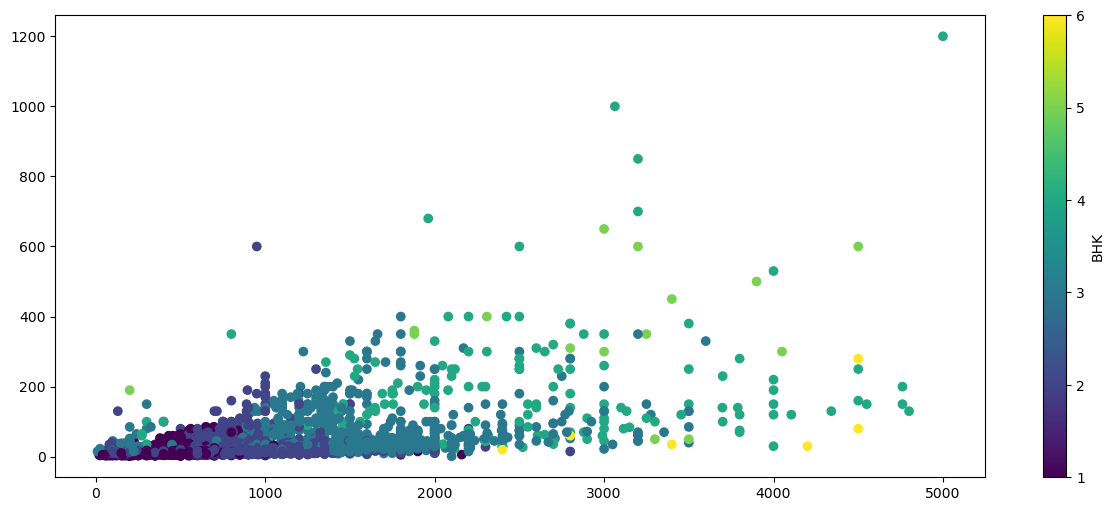

In [546]:
df = df[(df['Size']<= 5000 ) & (df['Rent'] <= 1500000)]
df = df.reset_index(drop=True)
plt.figure(figsize=(15, 6))
plt.scatter(x=df['Size'], y=df['Rent']/1000, c=df['BHK'])
plt.colorbar(label='BHK')

In [547]:
df.shape

(4741, 11)

<Axes: xlabel='City', ylabel='count'>

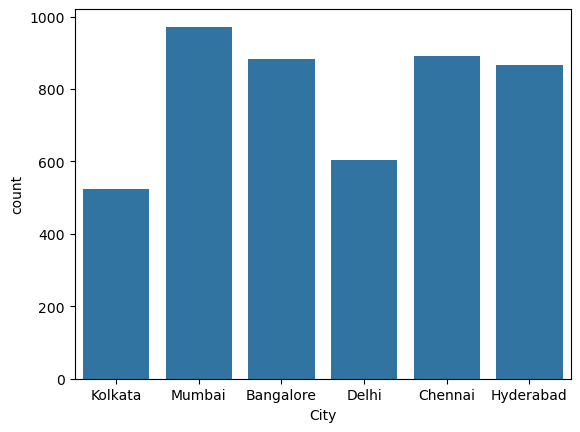

In [550]:
sns.countplot(data=df, x='City')

<Axes: xlabel='Furnishing Status', ylabel='count'>

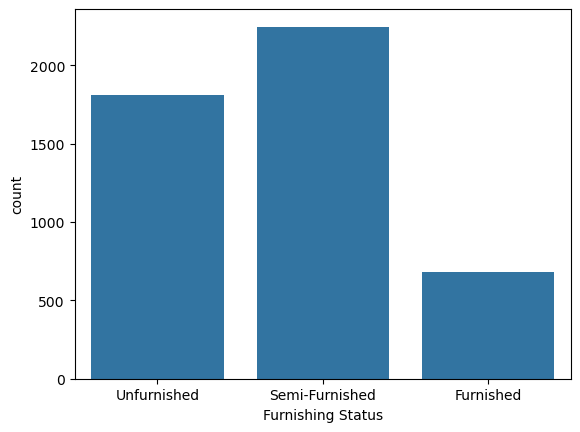

In [552]:
sns.countplot(x=df['Furnishing Status'])

In [554]:
df['Furnishing Status'].nunique()

3

In [556]:
df['Area Type'].nunique()

3

In [558]:
df['City'].nunique()

6

In [560]:
df['Point of Contact'].nunique()

3

In [562]:
df['Tenant Preferred'].nunique()

3

In [564]:
df.sample(5)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2240,1,9000,425,2 out of 5,Carpet Area,"Murugeshpalya, Airport Road",Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Agent
4257,3,20000,1250,2 out of 6,Super Area,Qutub Shahi Tombs,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
2705,3,65000,1600,Ground out of 4,Carpet Area,East Of Kailash,Delhi,Furnished,Bachelors/Family,2,Contact Agent
3748,1,5000,550,1 out of 1,Carpet Area,"Tambaram, GST Road",Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
3592,2,10000,900,1 out of 3,Super Area,Poonamallee,Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [566]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Rent']), df['Rent'], test_size=.2, random_state=10)
x_train

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
324,2,700,Ground out of 2,Carpet Area,Nungi More,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner
4071,2,1000,2 out of 8,Super Area,"Saroornagar, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
998,2,900,10 out of 15,Super Area,"7 Bungalow, Seven Bungalows",Mumbai,Unfurnished,Bachelors/Family,2,Contact Agent
2068,3,2400,3 out of 4,Super Area,Virupakshapura,Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner
1712,3,1500,1 out of 7,Super Area,"Kaggadasapura, Indira nagar",Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
...,...,...,...,...,...,...,...,...,...,...
1180,1,400,3 out of 4,Carpet Area,Bhandup,Mumbai,Semi-Furnished,Bachelors/Family,1,Contact Owner
3441,3,1200,1 out of 2,Carpet Area,Indira Colony,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
1344,4,2500,5 out of 12,Carpet Area,Bandra West,Mumbai,Furnished,Bachelors/Family,4,Contact Agent
4623,2,1180,4 out of 5,Super Area,"Miyapur, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner


## Encoding the Categoriacal Features 

In [569]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), ['City', 'Area Type', 'Point of Contact', 'Tenant Preferred']),
    ('oe', OrdinalEncoder(categories=[['Unfurnished', 'Semi-Furnished', 'Furnished']]), ['Furnishing Status'])
])
trf1

ColumnTransformer(transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['City', 'Area Type', 'Point of Contact',
                                  'Tenant Preferred']),
                                ('oe',
                                 OrdinalEncoder(categories=[['Unfurnished',
                                                             'Semi-Furnished',
                                                             'Furnished']]),
                                 ['Furnishing Status'])])

In [571]:
new_cols = trf1.fit_transform(x_train, y_train)
new_cols.shape

(3792, 12)

In [573]:
x_train.shape

(3792, 10)

In [575]:
x_train = x_train.reset_index(drop=True)

In [577]:
x_train = pd.concat([x_train , pd.DataFrame(new_cols, columns=['new1', 'new2', 'new3', 'new4', 'new5', 'new6', 'new7', 'ne81' ,'new9', 'new10', 'new11', 'new12']).reset_index(drop=True)], axis=1)

In [579]:
x_train = x_train.drop(columns=['Area Type', 'Area Locality', 'City', 'Tenant Preferred', 'Point of Contact', 'Floor', 'Furnishing Status'])
x_train

,BHK,Size,Bathroom,new1,new2,new3,new4,new5,new6,new7,ne81,new9,new10,new11,new12
0,2,700,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,2,1000,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,2,900,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,2400,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,3,1500,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,1,400,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3788,3,1200,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3789,4,2500,4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
3790,2,1180,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [581]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [583]:
test = trf1.transform(x_test)
test.shape

(949, 12)

In [585]:
x_test = x_test.reset_index(drop=True)

In [587]:
x_test = pd.concat([x_test, pd.DataFrame(test, columns=['new1', 'new2', 'new3', 'new4', 'new5', 'new6', 'new7', 'ne81' ,'new9', 'new10', 'new11', 'new12']).reset_index(drop=True)], axis=1)
x_test = x_test.drop(columns=['Area Type', 'Area Locality', 'City', 'Tenant Preferred', 'Point of Contact', 'Floor', 'Furnishing Status'])
x_test

,BHK,Size,Bathroom,new1,new2,new3,new4,new5,new6,new7,ne81,new9,new10,new11,new12
0,2,1100,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,2,950,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2,650,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
3,2,680,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,2,1005,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2,970,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0
945,3,1200,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
946,2,935,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
947,2,200,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0


In [589]:
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5590546215604129

In [591]:
print(lr.coef_)
print(lr.intercept_)

[ 2.76147340e+03  3.68722622e+01  1.02332295e+04 -1.70497450e+03
  1.39608508e+04 -1.08209593e+04  2.82729329e+03  5.64560818e+04
 -2.60388866e+04 -2.85444103e+04  2.53136565e+04 -6.41797995e+03
  2.48482297e+03 -5.00538643e+03  2.92069886e+03]
-10676.717737978703


In [595]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, x_train, y_train, cv=10)

array([0.54148555, 0.57403191, 0.60662787, 0.47153312, 0.49246814,
       0.33217805, 0.43443669, 0.44210148, 0.54384744, 0.61631391])